In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sys
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from statsmodels.stats.weightstats import ztest as ztest

In [2]:
df = pd.read_pickle ("df_clean")

In [3]:
df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
35135,143761,consideration,152951,0.0,iOS,video,0.75
35136,718464,interest,152951,0.0,Android,video,0.75
35137,967495,consideration,152951,0.0,Android,video,0.75
35138,957953,interest,152951,0.0,Android,video,0.75
35139,96984,consideration,152951,0.0,iOS,video,0.75
...,...,...,...,...,...,...,...
123903,1043694,interest,198250,0.0,iOS,native,2.00
123904,373644,interest,198251,0.0,iOS,native,2.00
123905,90066,interest,198253,0.0,iOS,native,2.00
123906,114369,consideration,198254,0.0,iOS,native,2.00


In [7]:
df_organic = df.loc[df['ad_channel'].isin(['organic_traffic','other'])]

df_organic = df_organic.groupby('funnel_stage',as_index=False).agg(countorg = ('user_id','count'))
df_organic

,funnel_stage,countorg
0,consideration,50302
1,intent,52368
2,interest,469988
3,purchase,536


In [8]:
df_pay = df.loc[df['ad_channel'].isin(['video','banner','native','partner_network','rich','search'])]

df_pay = df_pay.groupby('funnel_stage',as_index=False).agg(countpay = ('user_id','count'))
df_pay

,funnel_stage,countpay
0,consideration,253819
1,intent,218189
2,interest,2756232
3,purchase,3608


Text(0, 0.5, 'Количество клиентов')

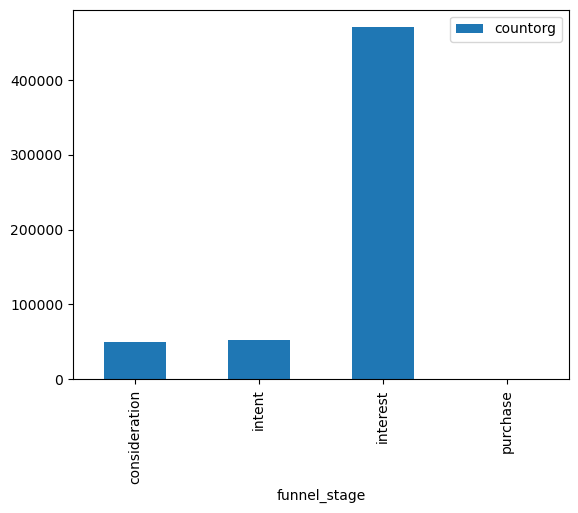

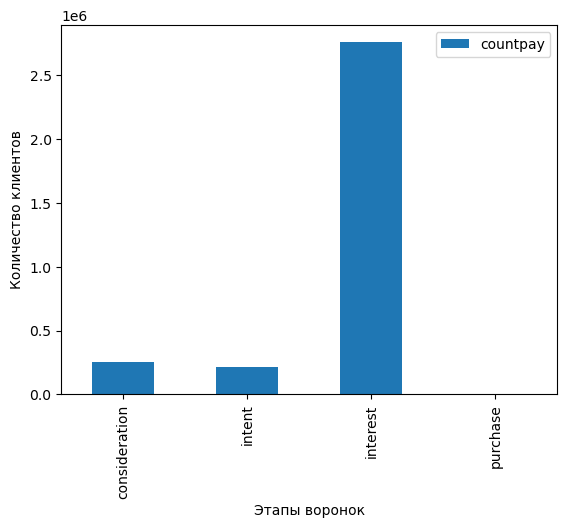

In [9]:
axes=df_organic.plot.bar('funnel_stage'),df_pay.plot.bar('funnel_stage')
plt.xlabel("Этапы воронок")
plt.ylabel("Количество клиентов")

In [10]:
consideration = 50302/253819
consideration

0.19818059325739995

In [11]:
interest = 469988/2756232
interest

0.17051830179752647

In [12]:
intent = 52368/218189
intent

0.24001209960172146

In [13]:
purchase = 536/3608
purchase

0.14855875831485588

### По результатам анализа мы видим,что два канала органического трафика составляют большой процент новых клиентов от платного трафика(минимум 15 процентов),этот процент повышается с момента заинтересованности клиента, и резко падает после этапа намеревания купить,стоит выявить почему

In [14]:
Consideration = df.loc[df['funnel_stage'].isin(['consideration'])]
Consideration_group = Consideration.groupby('ad_channel',as_index=False).agg(consideration_count=('user_id','count'))

<Axes: xlabel='ad_channel'>

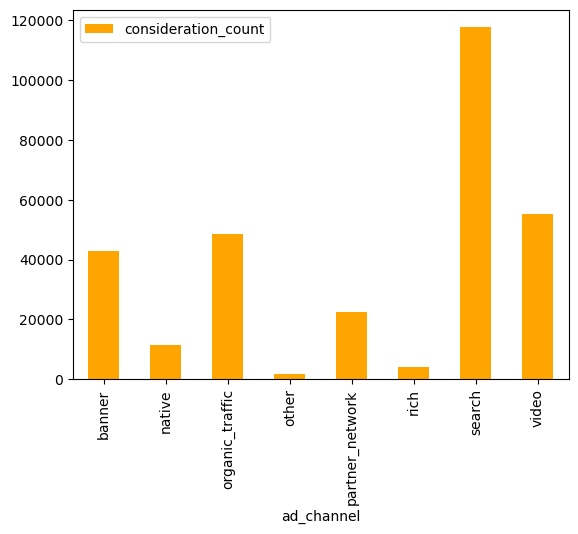

In [15]:
Consideration_group.plot.bar('ad_channel',color='orange')

In [16]:
Consideration_group

,ad_channel,consideration_count
0,banner,42937
1,native,11408
2,organic_traffic,48666
3,other,1636
4,partner_network,22421
5,rich,4229
6,search,117649
7,video,55175


In [17]:
Intent = df.loc[df['funnel_stage'].isin(['intent'])]
intent_group = Intent.groupby('ad_channel',as_index=False).agg(intent_count=('user_id','count'))

<Axes: xlabel='ad_channel'>

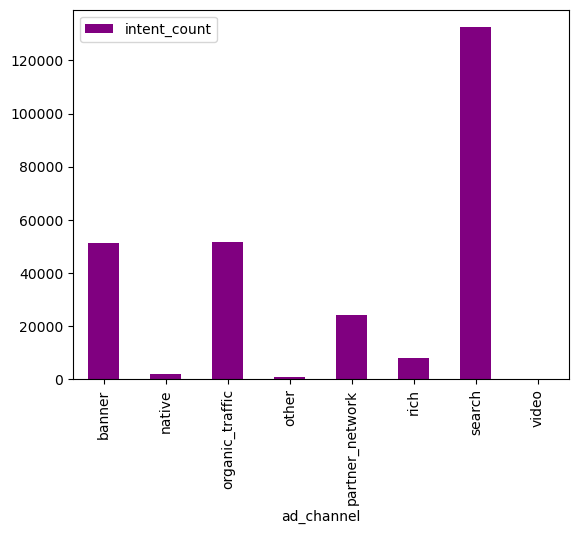

In [18]:
intent_group.plot.bar('ad_channel',color='purple')

In [19]:
intent_group

,ad_channel,intent_count
0,banner,51441
1,native,1915
2,organic_traffic,51601
3,other,767
4,partner_network,24219
5,rich,8130
6,search,132430
7,video,54


In [20]:
Purchase = df.loc[df['funnel_stage'].isin(['purchase'])]
purchase_group = Purchase.groupby('ad_channel',as_index=False).agg(purchase_count=('user_id','count'))

<Axes: xlabel='ad_channel'>

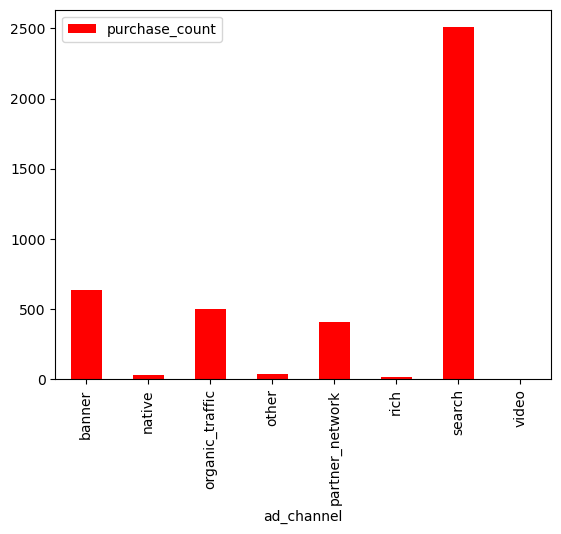

In [21]:
purchase_group.plot.bar('ad_channel',color='red')

In [22]:
purchase_group

,ad_channel,purchase_count
0,banner,636
1,native,33
2,organic_traffic,498
3,other,38
4,partner_network,407
5,rich,20
6,search,2507
7,video,5


### Проанализируем графики и выделим худшие и лучшие по сумме действий клиентов(consideration,intent,purchase).Худшие:video,rich,native. Лучшие:search,banner,organic_traffic

### Гипотезы:
    1)Если повысить органический трафик ,то прибыль вырастет
    2)Если развить каналы banner,partner_network,то удержание клиентов вырастет
    3)Если организовать приток клиентов ориентированных на использование Android,то конверсия в покупку вырастет

## По результатам анализа непригодным для продолжения использования можно признать канал -- video.Этот канал не приносит никакой прибыли,клиенты неудерживаются идя по нему(уходят на этапе consideration).Так же расходы на него составляют выше почти всех каналов,при этом нет конверсии в покупку.Стоит переаспределить активность на каналы:banner,partner_network.Так как по этим каналам прибыль больше,чем расходы по ним. Так же удержание по этим каналам держится на всех этапах воронки.По анализам метрик,можно сформулировать гипотезу о том,что если перераспределить ресурс с канала video на каналы banner,partner_network,то прибыль вырастет